In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier  # Import MLPClassifier for neural network
import matplotlib.pyplot as plt
import gdown

In [ ]:
# Download the datasets
X_train_url = 'https://drive.google.com/uc?id=1BWrmUITWyckmZ8PmQPex1PBn2iVEnO5z'
y_train_url = 'https://drive.google.com/uc?id=1gWYAAG8X67rRHTEjkcPND2UAFHy8-7kP'
gdown.download(X_train_url, 'X_train.csv', quiet=False)
gdown.download(y_train_url, 'y_train.csv', quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1BWrmUITWyckmZ8PmQPex1PBn2iVEnO5z
From (redirected): https://drive.google.com/uc?id=1BWrmUITWyckmZ8PmQPex1PBn2iVEnO5z&confirm=t&uuid=21526a60-387d-4445-91a5-fd8bb07a9064
To: /content/X_train.csv
100%|██████████| 168M/168M [00:04<00:00, 40.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1gWYAAG8X67rRHTEjkcPND2UAFHy8-7kP
To: /content/y_train.csv
100%|██████████| 27.5M/27.5M [00:00<00:00, 30.3MB/s]


'y_train.csv'


Neural Network Accuracy: 97.58%
Neural Network Precision: 0.83
Neural Network Recall: 0.93
Neural Network F1-Score: 0.88
Neural Network AUC-ROC: 0.99


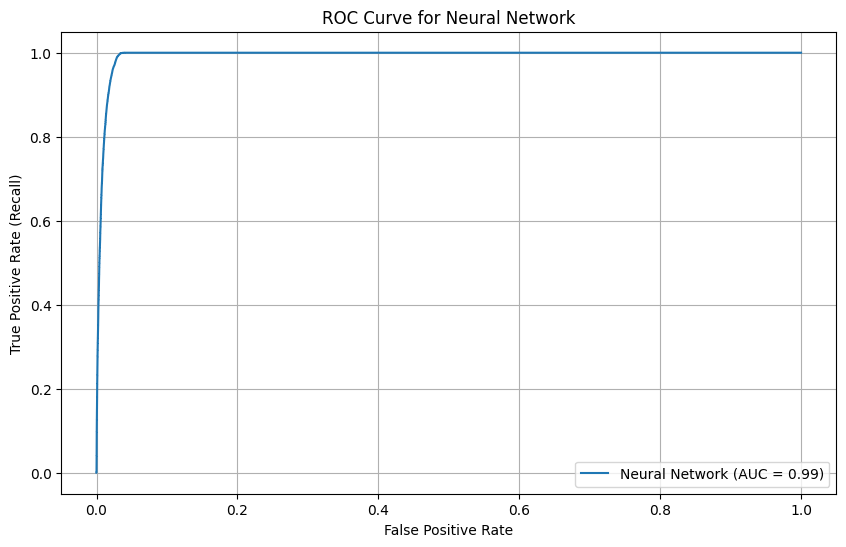

In [ ]:
# Load datasets
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')

# Drop the 'ID' column and extract the target column
X_train = X_train.drop(columns=['ID'])
y_train = y_train['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Apply feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Recursive Feature Elimination (RFE) with Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)  # Single hidden layer with 100 neurons

# Fit the model on scaled training data directly (no RFE here)
nn_model.fit(X_train_scaled, y_train)

# Predictions for Neural Network
y_pred_nn = nn_model.predict(X_test_scaled)
y_pred_prob_nn = nn_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate Neural Network
accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_pred_prob_nn)

print(f"\nNeural Network Accuracy: {accuracy_nn * 100:.2f}%")
print(f"Neural Network Precision: {precision_nn:.2f}")
print(f"Neural Network Recall: {recall_nn:.2f}")
print(f"Neural Network F1-Score: {f1_nn:.2f}")
print(f"Neural Network AUC-ROC: {auc_nn:.2f}")

# Plot ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, y_pred_prob_nn)

plt.figure(figsize=(10, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {auc_nn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Neural Network')
plt.legend(loc="lower right")
plt.grid()
plt.show()